In [2]:
from six.moves import urllib
from scipy.io import loadmat
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# mldata site no longer maintained; download dataset from github
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [4]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

In [5]:
X, y = mnist["data"], mnist["target"]

# X contains 70,000 samples each with dimensions of 28 x 28
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
some_digit_image[0:3, :]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=uint8)

<function matplotlib.pyplot.show(*args, **kw)>

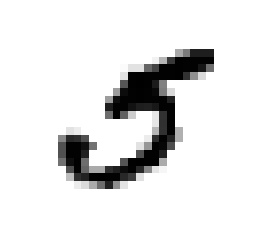

In [8]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show

In [9]:
y[36000]

5.0

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
y_train_5

array([False, False, False, ..., False, False, False])

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_digit])

array([False])

In [16]:
from sklearn.model_selection import cross_val_score

# cross_var_score implements K-fold cross-validation
# cv corresponds to k, i.e. the number of folds
# recall that in k-fold cross-validation, a new model is trained in each iteration
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ubuntu/ana

array([0.96445, 0.9606 , 0.9665 ])

In [17]:
from sklearn.base import BaseEstimator

# accuracy an imcomplete metric
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9102 , 0.9105 , 0.90825])

In [18]:
from sklearn.model_selection import cross_val_predict

# via docs "returns, for each element in the input, the prediction that was obtained for that element 
# when it was in the test set"
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ubuntu/ana

array([False, False, False, ..., False, False, False])

In [19]:
y_train_pred.size

60000

In [20]:
from sklearn.metrics import confusion_matrix

# rows are actual values, columns are predicted values
# the order is "negative" then "positive":
# TN FP
# FN TP

confusion_matrix(y_train_5, y_train_pred)

array([[53560,  1019],
       [ 1150,  4271]])

$$
\text{precision} = \frac{TP}{TP + FP}
$$

$$
\text{true positive rate or recall} = \frac{TP}{TP + FN} = \frac{TP}{P} 
$$

$$ 
\text{specificity} = \frac{TN}{TN + FP} = \frac{TN}{N} 
$$

$$
\text{false positive rate or fall-out} = \frac{FP}{FP + TN} = \frac{FP}{N} 
$$

where $P$ is the number of actually positive samples and $N$ is the number of actually negative samples

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8073724007561437

In [22]:
recall_score(y_train_5, y_train_pred)

0.7878620180778454

$F_1$ is the harmonic mean of precision and recall

$$
F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}
= \frac{2 * precision * recall}{precision + recall}
= \frac{TP}{TP + \frac{FN + FP}{2}}
$$

In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7974978993558025

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-87624.87323792])

In [25]:
# get all decision scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ubuntu/ana

array([-100213.06586389, -643208.85191257, -534671.0979934 , ...,
       -226175.48906514, -164102.4936771 , -343315.72359366])

In [26]:
y_train_5

array([False, False, False, ..., False, False, False])

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [28]:
y_train_5

array([False, False, False, ..., False, False, False])

In [29]:
precisions

array([0.0907417 , 0.09072648, 0.090728  , ..., 1.        , 1.        ,
       1.        ])

In [30]:
recalls

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [31]:
thresholds

array([-1742088.90156964, -1739957.09991888, -1739818.77394954, ...,
         986936.46671571,   989653.0971467 ,  1032658.5349847 ])

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

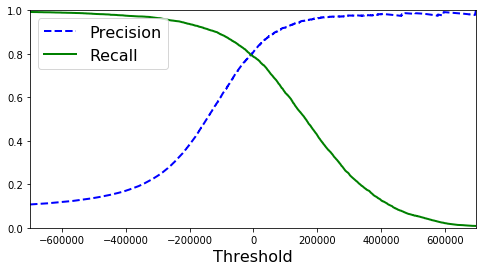

In [33]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

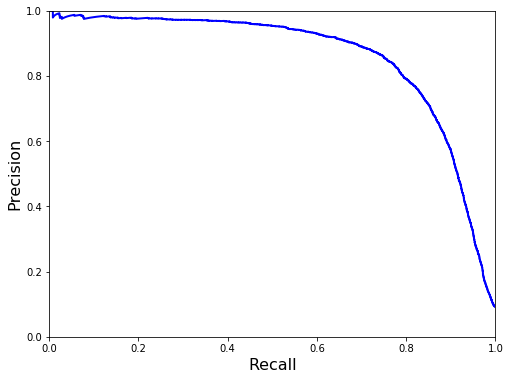

In [34]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [35]:
# if you aim for 90% precision, you'll need to set the threshold at around 70,000 (see graph of prec/recall
# vs threshold):

y_train_pred_90 = (y_scores > 70000)

In [36]:
precision_score(y_train_5, y_train_pred_90)

0.9001461276181199

In [37]:
recall_score(y_train_5, y_train_pred_90)

0.6817930271167681

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

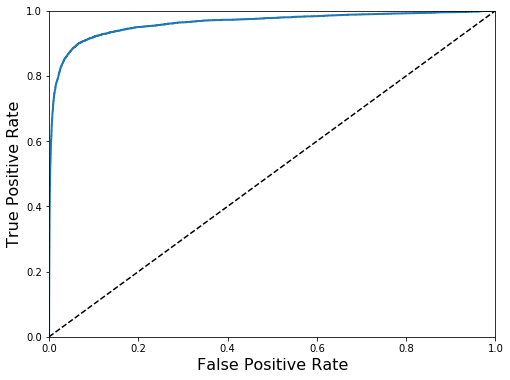

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

# as the threshold is decreased, the recall increases and the number of false positives increases (hence, the
# fall-out increases

# the dotted line is a purely random classifier

In [40]:
# the area under the roc curve of a perfect classifier is equal to one

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.962320556182058